# ***Presentación***

## **Tecnicatura Universitaria en Inteligencia Artificial**

### Trabajo Práctico - Minería de Datos

#### Support Vector Machines y Random Forest

---

**Equipo**:
- Revello Simon
- Giampaoli Fabio

**Fecha**: 24/11/2023

---

## ***Objetivo***


El objetivo de este trabajo practico es integrar los conocimientos adquiridos en las unidades 5 y 6
en un problema real asociado a la determinación del color de los granos de café mediante la
medición atributos característicos.

# ***Entorno***

En este bloque se importaran los modulos y conjuntos de datos inciales que seran de utilidad para el desarrollo de funcionalidades especificas de los problemas.

## Librerias

In [100]:
# procesamiento
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import boxcox

# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import widgets, interact

# modelos
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Datasets

Debe asegurarse de que la ruta a los archivos sea la correcta acorde a su entorno. En este caso cargamos ambos datasets al mismo tiempo en el entorno.

In [101]:
coffee = pd.read_csv('CoffeeRatings.csv', delimiter=';')

# ***Ejercicios***

## **Primer ejercicio**

---

Descargar el conjunto de CoffeeRatings.csv, para realizar el trabajo práctico. Analizar
los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.)

---

### Separacion del conjunto

In [102]:
def split_data(df, target_column='Color', test_size=0.2):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test

# Uso de la función
X_train, X_test, y_train, y_test = split_data(coffee)

In [103]:
print(X_train.shape, X_test.shape)

(668, 10) (167, 10)


### Informacion basica

In [104]:
X_train.head()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
478,758,775,75,758,758,758,100,100,11,8317
346,742,733,75,717,708,833,100,100,1,8233
462,767,767,767,792,75,767,100,100,0,8375
691,792,808,792,808,808,783,100,100,1,8592
302,75,767,767,75,783,717,100,100,11,8333


In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 478 to 102
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Scores_Aroma       668 non-null    int64
 1   Scores_Flavor      668 non-null    int64
 2   Scores_Aftertaste  668 non-null    int64
 3   Scores_Acidity     668 non-null    int64
 4   Scores_Body        668 non-null    int64
 5   Scores_Balance     668 non-null    int64
 6   Scores_Uniformity  668 non-null    int64
 7   Scores_Sweetness   668 non-null    int64
 8   Scores_Moisture    668 non-null    int64
 9   Scores_Total       668 non-null    int64
dtypes: int64(10)
memory usage: 57.4 KB


In [106]:
X_train.describe()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,618.172156,614.574850,619.450599,608.829341,607.685629,609.315868,196.567365,160.368263,8.392216,6733.470060
std,277.282057,274.940858,257.672948,280.123272,278.486712,277.395502,263.035384,209.240962,5.051643,2963.004653
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,717.000000,708.000000,692.000000,708.000000,708.000000,692.000000,100.000000,100.000000,1.000000,7833.000000
50%,758.000000,742.000000,733.000000,742.000000,742.000000,742.000000,100.000000,100.000000,11.000000,8183.000000
75%,767.000000,767.000000,758.000000,767.000000,767.000000,767.000000,100.000000,100.000000,12.000000,8317.000000
max,867.000000,883.000000,867.000000,875.000000,842.000000,858.000000,933.000000,933.000000,17.000000,9058.000000


In [107]:
def graficar_datos_faltantes(df):
    df = df.copy()
    total = df.shape[0]
    nulos = df.isnull().sum() # obtiene todos los nulos

    df_grafico = pd.DataFrame({'total': total, 'nulos': nulos}) # genera un dataframe de forma temporal

    plt.figure(figsize=(10, 6))
    sns.barplot(y=df_grafico.index, x=df_grafico['total'], color='violet', alpha=0.5) # bar que muestra todos los registros
    bar_nulos = sns.barplot(y=df_grafico.index, x=df_grafico['nulos'], color='blue', alpha=0.5) # bar que muestra solo los nulos

    plt.xlabel('Cantidad de registros', fontsize=12)
    plt.ylabel('Variables', fontsize=12)
    plt.title('Cantidad de datos faltantes por variable', fontsize=16)

    # Agrega la cantidad de valores nulos a cada barra
    for i, v in enumerate(df_grafico['nulos']):
        bar_nulos.text(v + 0.2, i + .2, str(v), color='black', fontweight='bold')

    plt.show()

def graficar_elementos_unicos(df):
    n_unicos = df.nunique() # obtiene el numero de valores unicos de cada variable

    plt.figure(figsize=(10, 6))
    bar_unicos = sns.barplot(x=n_unicos.index, y=n_unicos.values, alpha=0.8) # grafico en barplot

    plt.ylabel('Cantidad de elementos únicos', fontsize=12)
    plt.xlabel('Variables', fontsize=12)
    plt.title('Cantidad de elementos únicos por variable', fontsize=16)
    plt.xticks(rotation='vertical')

    # Agrega la cantidad de elementos únicos a cada barra
    for i, v in enumerate(n_unicos):
        bar_unicos.text(i, v + 0.2, str(v), color='black', fontweight='bold', ha='center')

    plt.show()


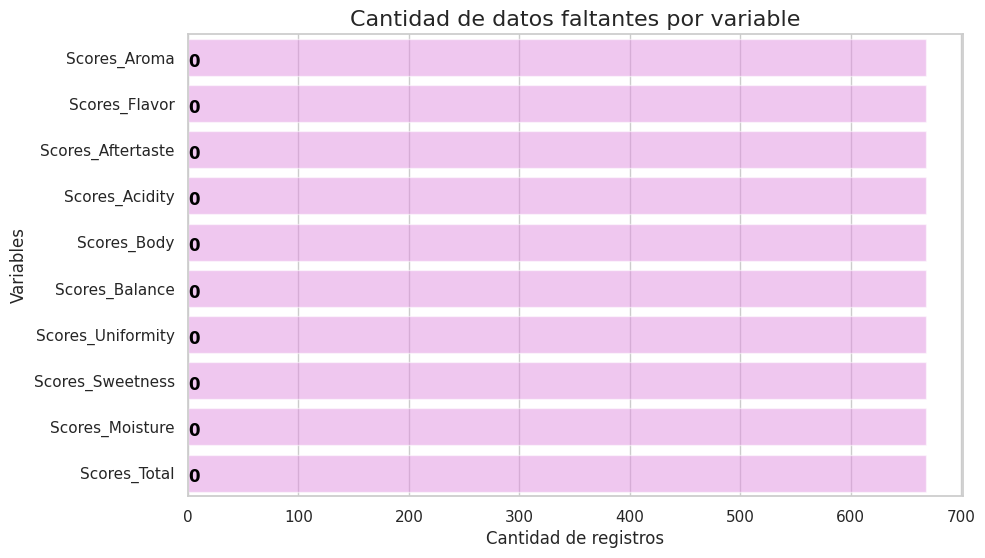

In [108]:
graficar_datos_faltantes(X_train)

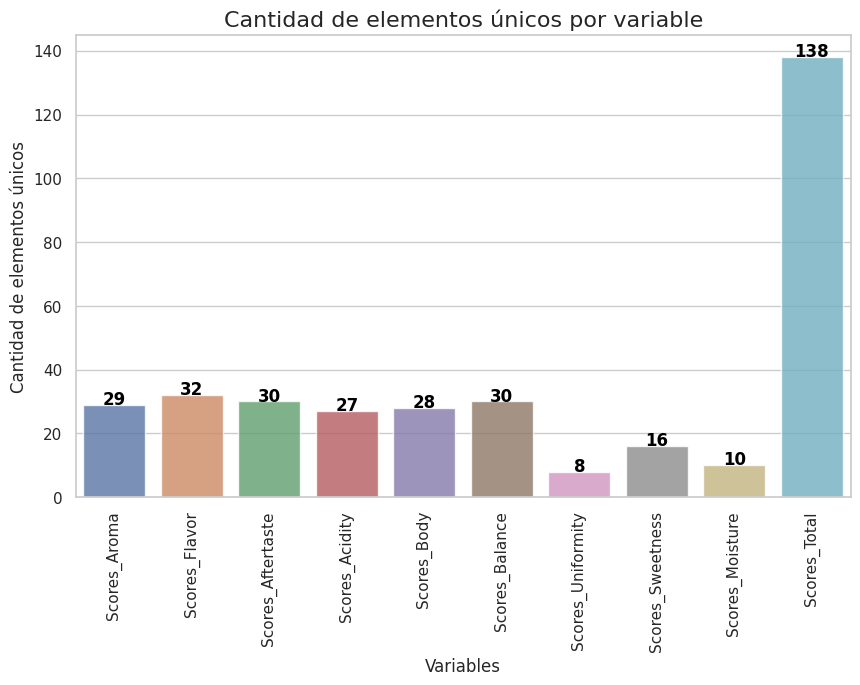

In [109]:
graficar_elementos_unicos(X_train)

### Distribuciones por clase

In [110]:
def create_plots(X_train, y_train, explanatory_var, class_var, class_value):
    df = pd.concat([X_train, y_train], axis=1)
    if class_value != 'Todas':
        df = df[df[class_var] == class_value]

    fig, axs = plt.subplots(3, 1, figsize=(8,6))

    # scatter unidimensional
    sns.stripplot(x=explanatory_var, y=[""]*len(df), hue=class_var, data=df, jitter=True, ax=axs[0])
    axs[0].set_title('Distribución de ' + explanatory_var + ' con respecto a ' + class_var)
    axs[0].legend('')
    axs[0].set_xlabel("")

    # caja de metricas de distribucion
    sns.boxplot(y=class_var, x=explanatory_var, data=df, orient='h', ax=axs[1])
    axs[1].legend('')
    axs[1].set_xlabel("")

    # densidad de datos
    sns.kdeplot(data=df, x=explanatory_var, hue=class_var, fill=True, ax=axs[2])
    axs[2].set_xlabel(explanatory_var)
    axs[2].legend('')

    plt.tight_layout()
    plt.show()

# menu de seleccion de variable
explanatory_var_widget = widgets.Dropdown(
    options=[col for col in X_train.columns],
    description='Explicativa:',
)

# menu de seleccion de estado
class_value_widget = widgets.Dropdown(
    options=['Todas'] + list(y_train.unique()),
    description='Color:',
)

interact(create_plots, X_train=widgets.fixed(X_train), y_train=widgets.fixed(y_train), explanatory_var=explanatory_var_widget, class_var=widgets.fixed('Color'), class_value=class_value_widget)


interactive(children=(Dropdown(description='Explicativa:', options=('Scores_Aroma', 'Scores_Flavor', 'Scores_A…

<function __main__.create_plots(X_train, y_train, explanatory_var, class_var, class_value)>

### Distribuciones por variable

In [111]:
def create_dist(X_train, y_train, variable):
    df = pd.concat([X_train, y_train], axis=1)
    # Crear un diccionario de colores unicos para cada variable
    color_dict = {col: color for col, color in zip(df.columns, sns.color_palette("hsv", len(df.columns)))}

    fig, ax = plt.subplots(figsize=(10, 4))

    # Boxplot
    bp = ax.boxplot(df[variable], patch_artist=True, vert=False)
    bp['boxes'][0].set_facecolor(color_dict[variable])
    bp['boxes'][0].set_alpha(0.7)

    # Violin plot (nubes)
    vp = ax.violinplot(df[variable], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)
    vp['bodies'][0].get_paths()[0].vertices[:, 1] = np.clip(vp['bodies'][0].get_paths()[0].vertices[:, 1], 0.8, 1.2)
    vp['bodies'][0].set_color(color_dict[variable])
    vp['bodies'][0].set_alpha(0.25)

    # Scatter plot (lluvia)
    y = np.full(len(df[variable]), 0.75) + np.random.uniform(low=-.05, high=.05, size=len(df[variable]))
    ax.scatter(df[variable], y, s=8, color=color_dict[variable], alpha=0.5)

    # Configurar títulos y etiquetas
    ax.set_title(variable)
    ax.set_yticks([])
    ax.set_xlabel("Value")

    plt.show()

# Crear selector de variable
variable_widget = widgets.Dropdown(
    options=[col for col in X_train], # no incluyo state por que es categoria
    description='Variable:',
)

# Usar interact para crear la actualizar el grafico en un cambio
interact(create_dist, X_train=widgets.fixed(X_train), y_train=widgets.fixed(y_train), variable=variable_widget)


interactive(children=(Dropdown(description='Variable:', options=('Scores_Aroma', 'Scores_Flavor', 'Scores_Afte…

<function __main__.create_dist(X_train, y_train, variable)>

### Correlaciones

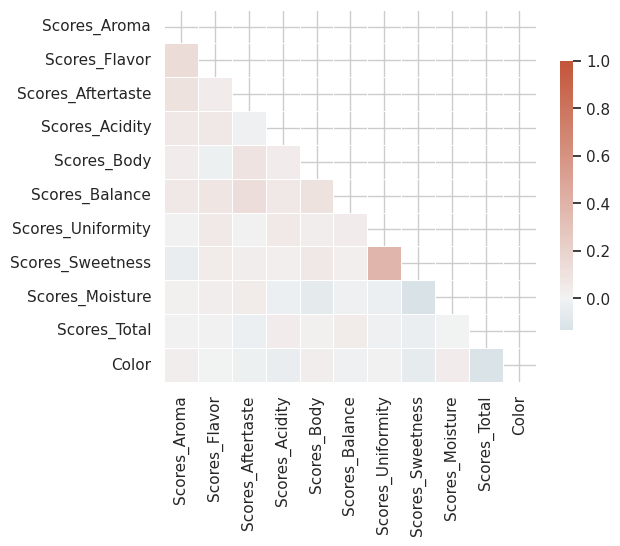

In [112]:

def grafico_correlacion(X_train, y_train, columnas):
    df_copy = pd.concat([X_train, y_train], axis=1)  # Hacer una copia del dataframe

    for columna in columnas:
        # Hacer un encoding de frecuencia para la variable categórica
        encoding = df_copy.groupby(columna).size()
        encoding = encoding / len(df_copy)
        df_copy[columna] = df_copy[columna].map(encoding)

    # Calcular la matriz de correlación
    corr = df_copy.corr()

    # Crear una máscara para el triángulo superior para no mostrar repetidos
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Generar un mapa de colores divergentes personalizado
    fig, ax = plt.subplots(figsize=(6, 7))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Dibujar el mapa de calor con la máscara y la relación de aspecto correcta
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    # Mostrar el gráfico
    plt.show()

grafico_correlacion(X_train, y_train, ['Color']) # state es la unica categorica aqui

### Modelo base de clasificacion

In [113]:
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    # Entrena el modelo SVM
    clf.fit(X_train, y_train)

    # Realiza las predicciones
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calcula las probabilidades para el cálculo de AUC
    lb = LabelBinarizer()
    lb.fit(y_train)
    y_train_prob = clf.predict_proba(X_train)
    y_test_prob = clf.predict_proba(X_test)

    # accuracy para ambos sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # f1 para ambos sets y clases
    train_f1 = f1_score(y_train, y_train_pred, average=None)
    test_f1 = f1_score(y_test, y_test_pred, average=None)

    # auc para ambos sets
    train_auc = roc_auc_score(lb.transform(y_train), y_train_prob, multi_class='ovr')
    test_auc = roc_auc_score(lb.transform(y_test), y_test_prob, multi_class='ovr')

    # Crear diccionario con los resultados para el conjunto de entrenamiento
    train_results = {
        'set': 'Train',
        'Green': {'accuracy': train_accuracy, 'f1': train_f1[0], 'auc': train_auc},
        'Blue-Green': {'accuracy': train_accuracy, 'f1': train_f1[1], 'auc': train_auc},
        'Bluish-Green': {'accuracy': train_accuracy, 'f1': train_f1[2], 'auc': train_auc},
    }

    # Crear diccionario con los resultados para el conjunto de prueba
    test_results = {
        'set': 'test',
        'Green': {'accuracy': test_accuracy, 'f1': test_f1[0], 'auc': test_auc},
        'Blue-Green': {'accuracy': test_accuracy, 'f1': test_f1[1], 'auc': test_auc},
        'Bluish-Green': {'accuracy': test_accuracy, 'f1': test_f1[2], 'auc': test_auc},
    }

    # Convertir los diccionarios a DataFrames
    train_df = pd.DataFrame(train_results).reset_index()
    test_df = pd.DataFrame(test_results).reset_index()

    result_clasif = pd.concat([train_df, test_df], axis=0)
    result_clasif.columns = ['metric', 'set', 'Green', 'Blue-Green', 'Bluish-Green']

    return result_clasif.sort_values(by='metric')


In [114]:
model = svm.SVC(probability=True)
train_and_evaluate(model, X_train, X_test, y_train, y_test)

,metric,set,Green,Blue-Green,Bluish-Green
0,accuracy,Train,0.817365,0.817365,0.817365
0,accuracy,test,0.808383,0.808383,0.808383
2,auc,Train,0.566623,0.566623,0.566623
2,auc,test,0.583524,0.583524,0.583524
1,f1,Train,0.000000,0.000000,0.899506
1,f1,test,0.000000,0.000000,0.894040


### Reduccion de dimensionalidad

columnas de coffee: 10


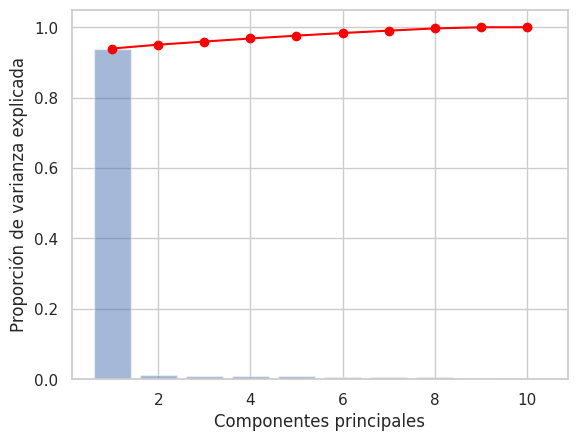

In [115]:
#--- Obtencion de los componentes ---#
pca = PCA()

X_train_pca_result = pca.fit_transform(X_train)
X_test_pca_result = pca.transform(X_test)

X_train_pca = pd.DataFrame(data=X_train_pca_result, columns=[f"PC{i+1}" for i, _ in enumerate(X_train.columns)]) # genera un df de las componentes
X_test_pca = pd.DataFrame(data=X_test_pca_result, columns=[f"PC{i+1}" for i, _ in enumerate(X_test.columns)]) # genera un df de las componentes

#--- Explicabilidad de los componentes ---#

varianza = np.cumsum(pca.explained_variance_ratio_)

acum = pd.DataFrame({"Component": X_train_pca.columns,
                     "EigenValues": pca.explained_variance_,
                     "PropVar": pca.explained_variance_ratio_,
                     "VarAcum": varianza}) # aca interesa la varianza acumulada, que se asemeja al porcentaje de explicabilidad de los datos


print(f'columnas de coffee: {X_train.shape[1]}')

#--- grafico de explicabilidad ---#

plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align="center")
plt.plot(range(1, 11), varianza, marker="o" ,color="red")
plt.ylabel("Proporción de varianza explicada")
plt.xlabel("Componentes principales")
plt.show()


In [116]:
fig = px.scatter_3d(X_train_pca, x='PC1', y='PC2', z='PC3', color=y_train)
fig.show()

In [117]:
X_train_reduced = X_train_pca[[f"PC{i}" for i in range(1, 4)]] # consideramos solo los primeros dos componentes
X_test_reduced = X_test_pca[[f"PC{i}" for i in range(1, 4)]]

X_train_with_pca = pd.concat([X_train.reset_index(drop=True), X_train_reduced], axis=1)
X_test_with_pca = pd.concat([X_test.reset_index(drop=True), X_test_reduced], axis=1)

model_pca = svm.SVC(probability=True)
train_and_evaluate(model_pca, X_train_with_pca, X_test_with_pca, y_train, y_test)

,metric,set,Green,Blue-Green,Bluish-Green
0,accuracy,Train,0.817365,0.817365,0.817365
0,accuracy,test,0.808383,0.808383,0.808383
2,auc,Train,0.628759,0.628759,0.628759
2,auc,test,0.567525,0.567525,0.567525
1,f1,Train,0.000000,0.000000,0.899506
1,f1,test,0.000000,0.000000,0.894040


### Balanceo de clases

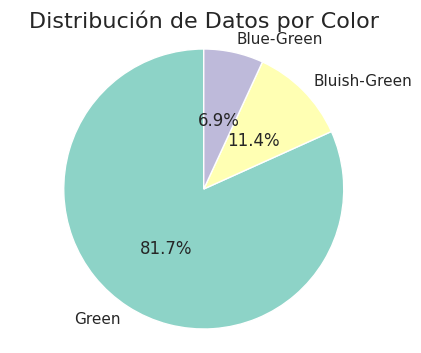

In [118]:
def graficar_proporcion_datos(X_train, y_train, column):
    df = pd.concat([X_train, y_train], axis=1)
    value_counts = df[column].value_counts() # cantidad de calores de cada clase

    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(5, 4))

    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.5, colors=sns.color_palette('Set3')) # visualizacion en pie chart

    plt.title(f'Distribución de Datos por {column}', fontsize=16)
    plt.axis('equal')

    plt.show()

graficar_proporcion_datos(X_train, y_train, 'Color')

In [126]:
def over_classes(X, y):
    # Crear el objeto SMOTE
    smote = SMOTE(sampling_strategy={'Green': 546, 'Blue-Green': 480, 'Bluish-Green': 480}, random_state=42)
    X_res, y_res = smote.fit_resample(X, y)

    print(f'shape balanceado: {X_res.shape[0]}')

    # Devolver el DataFrame balanceado
    return X_res, y_res

# Llamada a la función
X_train_over, y_train_over = over_classes(X_train, y_train)
print(f'shape original: {coffee.shape[0]}')

shape balanceado: 1506
shape original: 835


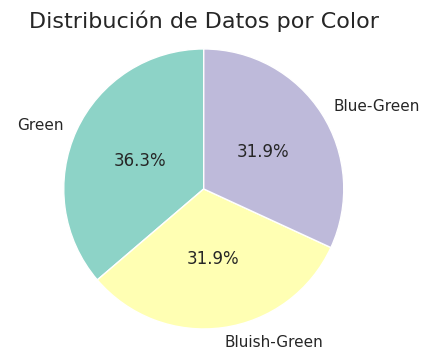

In [127]:
graficar_proporcion_datos(X_train_over, y_train_over, 'Color')

In [129]:
model_over = svm.SVC(probability=True)
train_and_evaluate(model_over, X_train_over, X_test, y_train_over, y_test)

,metric,set,Green,Blue-Green,Bluish-Green
0,accuracy,Train,0.491368,0.491368,0.491368
0,accuracy,test,0.311377,0.311377,0.311377
2,auc,Train,0.707485,0.707485,0.707485
2,auc,test,0.527066,0.527066,0.527066
1,f1,Train,0.593528,0.453191,0.375155
1,f1,test,0.101266,0.173913,0.451613


In [133]:
from imblearn.under_sampling import RandomUnderSampler

def under_sample_classes(X, y):
    # Crear el objeto RandomUnderSampler
    rus = RandomUnderSampler(sampling_strategy={'Green': 100}, random_state=42)
    X_res, y_res = rus.fit_resample(X, y)

    print(f'shape balanceado: {X_res.shape[0]}')

    # Devolver el DataFrame balanceado
    return X_res, y_res

# Llamada a la función
X_train_under, y_train_under = under_sample_classes(X_train, y_train)
print(f'shape original: {coffee.shape[0]}')


shape balanceado: 222
shape original: 835


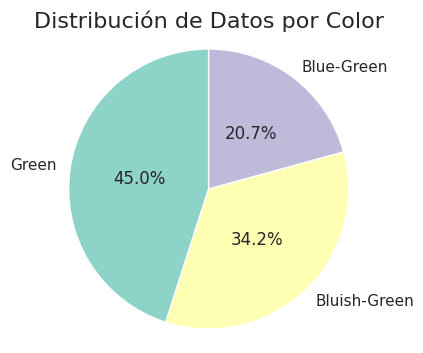

In [134]:
graficar_proporcion_datos(X_train_under, y_train_under, 'Color')

In [135]:
model_under = svm.SVC(probability=True)
train_and_evaluate(model_under, X_train_under, X_test, y_train_under, y_test)

,metric,set,Green,Blue-Green,Bluish-Green
0,accuracy,Train,0.450450,0.450450,0.450450
0,accuracy,test,0.808383,0.808383,0.808383
2,auc,Train,0.670007,0.670007,0.670007
2,auc,test,0.567465,0.567465,0.567465
1,f1,Train,0.000000,0.000000,0.621118
1,f1,test,0.000000,0.000000,0.894040


### Valores Atipicos

In [136]:
def remove_outliers(X_train, X_test, y_train, y_test):
    Q1 = X_train.quantile(0.25)
    Q3 = X_train.quantile(0.75)
    IQR = Q3 - Q1

    # Solo mantener las filas en el conjunto de entrenamiento que están dentro del rango intercuartil
    train_mask = ((X_train >= (Q1 - 1.5 * IQR)) & (X_train <= (Q3 + 1.5 * IQR))).all(axis=1)
    X_train = X_train[train_mask]
    y_train = y_train[train_mask]

    # Solo mantener las filas en el conjunto de prueba que están dentro del rango intercuartil
    test_mask = ((X_test >= (Q1 - 1.5 * IQR)) & (X_test <= (Q3 + 1.5 * IQR))).all(axis=1)
    X_test = X_test[test_mask]
    y_test = y_test[test_mask]

    return X_train, X_test, y_train, y_test

# Uso de la función
X_train_out, X_test_out, y_train_out, y_test_out = remove_outliers(X_train_over, X_test, y_train_over, y_test)

In [138]:

# Crear selector de variable
variable_widget = widgets.Dropdown(
    options=[col for col in X_train_out], # no incluyo state por que es categoria
    description='Variable:',
)

# Usar interact para crear la actualizar el grafico en un cambio
interact(create_dist, X_train=widgets.fixed(X_train_out), y_train=widgets.fixed(y_train_out), variable=variable_widget)


interactive(children=(Dropdown(description='Variable:', options=('Scores_Aroma', 'Scores_Flavor', 'Scores_Afte…

<function __main__.create_dist(X_train, y_train, variable)>

In [137]:
model_out = svm.SVC(probability=True)
train_and_evaluate(model_out, X_train_out, X_test_out, y_train_out, y_test_out)

,metric,set,Green,Blue-Green,Bluish-Green
0,accuracy,Train,0.403030,0.403030,0.403030
0,accuracy,test,0.181818,0.181818,0.181818
2,auc,Train,0.637632,0.637632,0.637632
2,auc,test,0.500000,0.500000,0.500000
1,f1,Train,0.000000,0.574514,0.000000
1,f1,test,0.000000,0.307692,0.000000


### Escalado de datos

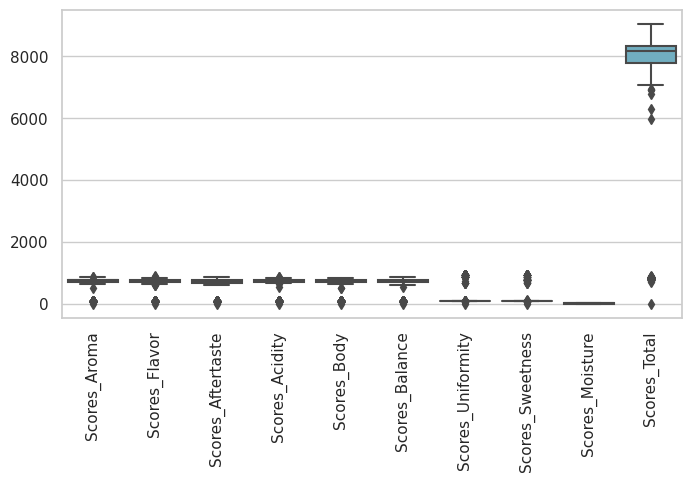

In [141]:
def show_distrbutions(df):
    plt.figure(figsize=(8, 4))
    sns.boxplot(df)
    plt.xticks(rotation=90)
    plt.show()

show_distrbutions(coffee)

In [147]:
def estandarize(X_train, scale_type, scaler_trained=None):
  data = X_train.copy()

  scalers = {'Standard': StandardScaler(),
               'MinMax': MinMaxScaler(),
               'Robust': RobustScaler()}
  if scaler_trained is None:
    scaler = scalers[scale_type]
  else:
    scaler = scaler_trained

  data_scaled = scaler.fit_transform(data)
  data_standardized = pd.DataFrame(data_scaled, columns=data.columns)

  if scaler_trained is None:
    return data_standardized, scaler
  else:
    return data_standardized

# Function to perform the selected standardization method
def perform_standardization(method):

    df_scaled, scaler = estandarize(X_train_out, method, None)
    show_distrbutions(df_scaled)

# Dropdown widget for selecting the standardization method
standardization_dropdown = widgets.Dropdown(
    options=['Standard', 'MinMax', 'Robust'],
    value='Standard',
    description='Method:',
    disabled=False,
)

# Define an interactive output widget
output = widgets.interactive_output(perform_standardization, {'method': standardization_dropdown})

# Display the widgets
display(standardization_dropdown, output)


Dropdown(description='Method:', options=('Standard', 'MinMax', 'Robust'), value='Standard')

Output()

In [176]:
X_train_standar, scaler_standar = estandarize(X_train, 'Standard', None)
X_test_standar = estandarize(X_test, 'Standard', scaler_standar)

In [177]:
model_standar = svm.SVC(probability=True)
train_and_evaluate(model_standar, X_train_standar, X_test_standar, y_train, y_test)

,metric,set,Green,Blue-Green,Bluish-Green
0,accuracy,Train,0.820359,0.820359,0.820359
0,accuracy,test,0.808383,0.808383,0.808383
2,auc,Train,0.770987,0.770987,0.770987
2,auc,test,0.558497,0.558497,0.558497
1,f1,Train,0.000000,0.051282,0.900990
1,f1,test,0.000000,0.000000,0.894040


### Conclusion

Todos los tratamientos de pca, oversmapling, outlier, y estandarizacion mejoran las metricas, pero genera mucho desbalanceo (overfitting muy brusco). Asi que lo mejor no manipual el dataset como tal, sino buscar reducir la influencia de estos rasgos mediante hiperparametrizacion del modelo de support vector machine

## **Segundo ejercicio**

---

Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel lineal
analizando el parámetro costo. Mostar los resultados sobre los conjuntos de test
(Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k =5

---

### Section

### Section

### Section

## **Tercer ejercicio**

---

Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel
gaussiano analizando los parámetros costo y gama. Mostar los resultados sobre los
conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con
k =5.

---

### Section

### Section

### Section

## **Cuarto ejercicio**

---

Realizar la predicción del atributo Color utilizando Random Forest analizando los
parámetros cantidad de estimadores y la máxima profundidad de los árboles. Mostar los
resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando
validación cruzada con k =5.

---

### Section


### Section


### Section


# ***Conclusiones***